In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from astropy import constants as const
from ClusterModel import model
from ClusterModel import model_tools
from ClusterTools import cluster_profile
from ClusterTools import cluster_spectra
from ClusterTools import cluster_spectra_kafexhiu2014

dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15, # Ensure enough space on the left so that all plot can be aligned
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster()
clust.EBL_model = 'none'
clust.nuclear_enhancement = False
clust.helium_mass_fraction = 0.0
clust.abundance = 0.0
clust.Epmax = 1e7*u.GeV

clust.Npt_per_decade_integ = 100

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.
Setting EBL_model value
Setting nuclear_enhancement value
Setting helium mass fraction value
Setting abundance value
Setting Epmax value
Setting number of point per decade (for integration) value


# Check the injection rate

/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


<Quantity [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           ...,
           [2.07605759e-47, 1.95951017e-47, 1.84948239e-47, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [2.48380605e-49, 2.34436812e-49, 2.21273031e-49, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00]] 1 / (cm3 GeV s)>

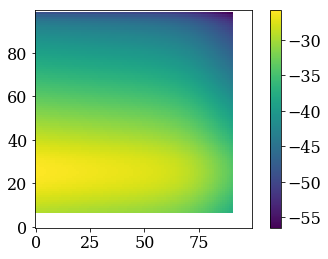

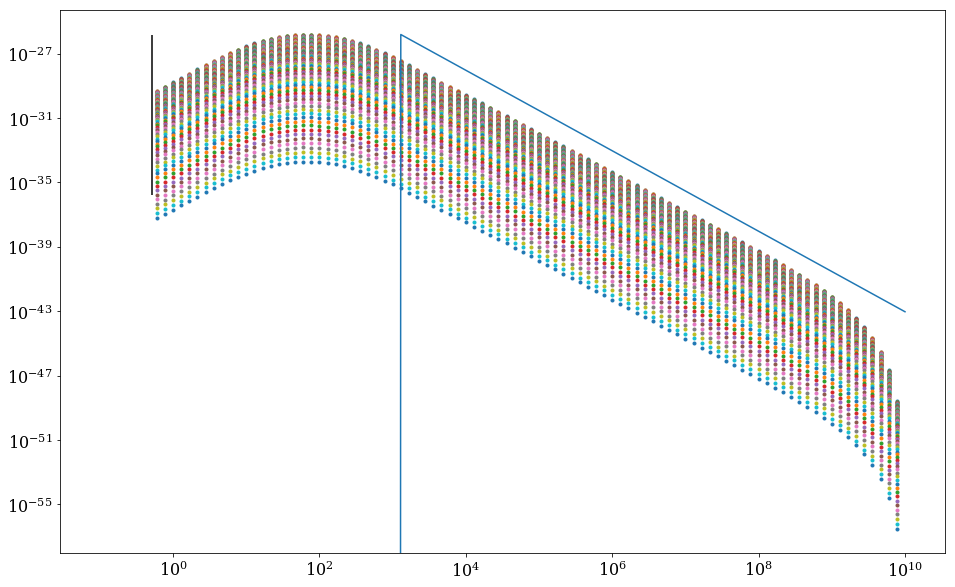

In [3]:
energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
R_cre = clust.get_rate_cre(energy, radius)
e, S_crp = clust.get_crp_spectrum(energy)

plt.figure(1)
plt.imshow(np.log10(R_cre.value), origin='lower')
plt.colorbar()

plt.figure(2, figsize=(15,10))
for i in range(len(R_cre[0,:])):
    plt.loglog(energy, R_cre[:,i], '.')
plt.loglog(energy, S_crp*np.amax(R_cre.value)/np.amax(S_crp.value))
plt.vlines((const.m_e*const.c**2).to('MeV').value, 1e-10*np.amax(R_cre.value), np.amax(R_cre.value))
R_cre

In [4]:
%%timeit
clust.Npt_per_decade_integ = 100
energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
R_cre = clust.get_rate_cre(energy, radius)

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
1 loop, best of 3: 1.69 s per loop


# Check CRe spectrum 

In [5]:
%%timeit
clust.Npt_per_decade_integ = 100

energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
Scre = clust.get_spectrum_cre(energy, radius)

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
1 loop, best of 3: 17.4 s per loop


In [20]:
clust.Npt_per_decade_integ = 10

energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
S_cre = clust.get_spectrum_cre(energy, radius)
e, S_crp = clust.get_crp_spectrum(energy)

Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


<Quantity [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]] 1 / (cm3 GeV)>

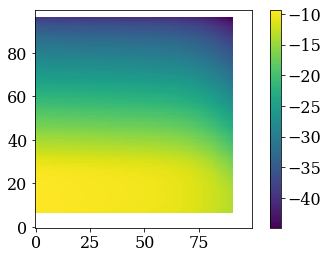

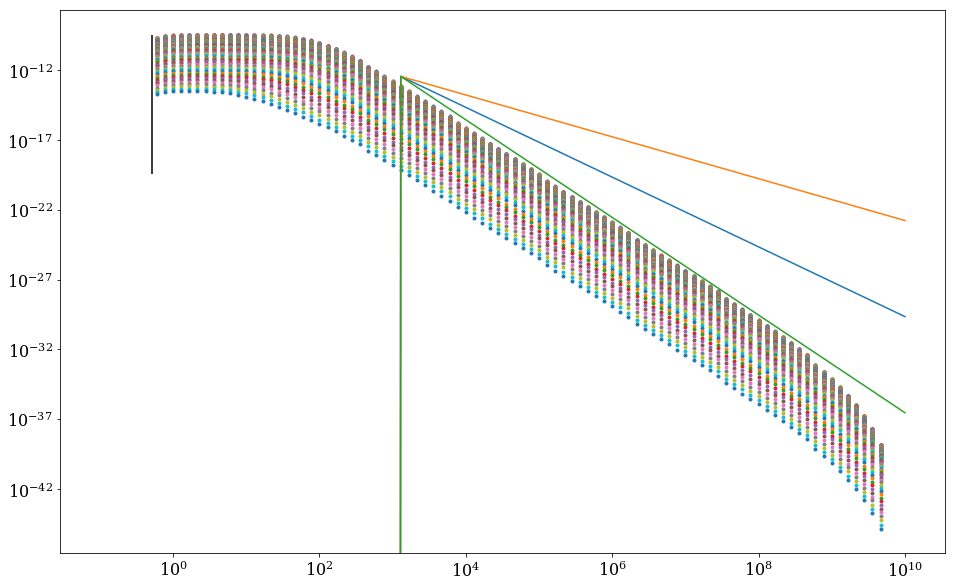

In [21]:
plt.figure(1)
plt.imshow(np.log10(S_cre.value), origin='lower')
plt.colorbar()

plt.figure(2, figsize=(15,10))
for i in range(len(S_cre[0,:])):
    plt.loglog(energy, S_cre[:,i], '.')
plt.loglog(energy, S_crp*np.amax(S_cre.value)/np.amax(S_crp.value)/1000)
plt.loglog(energy, (energy*S_crp)*np.amax(S_cre.value)/np.amax(((energy*S_crp)).value)/1000)
plt.loglog(energy, (energy**-1*S_crp)*np.amax(S_cre.value)/np.amax(((energy**-1*S_crp)).value)/1000)
plt.vlines((const.m_e*const.c**2).to('MeV').value, 1e-10*np.amax(S_cre.value), np.amax(S_cre.value))
S_cre

In [28]:
energy=np.logspace(-1,10, 100)*u.MeV
radius=np.logspace(0,4,100)*u.kpc
clust.Npt_per_decade_integ = 100
S_cre_1 = clust.get_spectrum_cre(energy, radius)
clust.Npt_per_decade_integ = 20
S_cre_2 = clust.get_spectrum_cre(energy, radius)

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


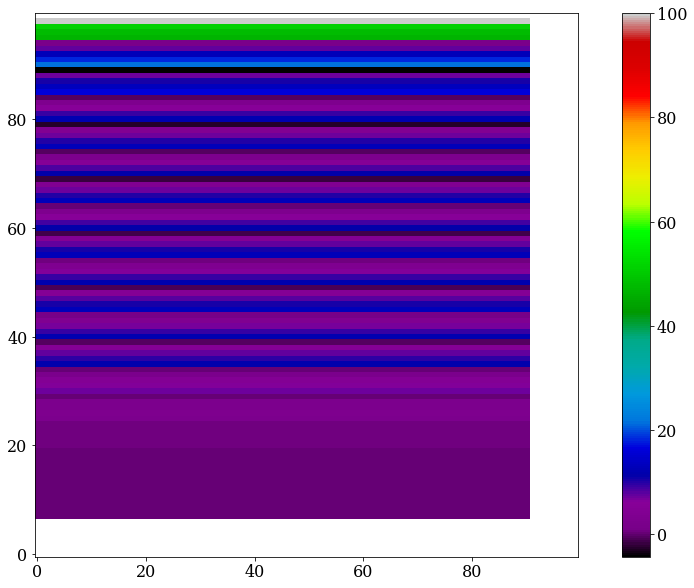

In [33]:
plt.figure(1, figsize=(15,10))
plt.imshow((S_cre_1.value-S_cre_2.value)/S_cre_1.value*100, origin='lower', cmap='nipy_spectral')
plt.colorbar()